# Pruebas de Normalidad con Python

In [2]:
import numpy as np 
import pylab 
import scipy.stats as ss

In [4]:
measurements = np.random.normal(size=100) #N(0,1)
#measurements = np.random.normal(loc = 20, scale = 5, size=100) #N(20,5)

### Histograma

(array([ 1.,  3.,  8., 17., 20., 18., 19., 10.,  1.,  3.]),
 array([-2.51984959, -2.00315826, -1.48646694, -0.96977561, -0.45308428,
         0.06360705,  0.58029838,  1.0969897 ,  1.61368103,  2.13037236,
         2.64706369]),
 <a list of 10 Patch objects>)

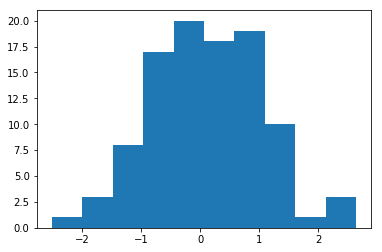

In [5]:
pylab.hist(measurements)

### Diagrama de caja o boxplot

{'whiskers': [<matplotlib.lines.Line2D at 0x7f79da9d1e80>,
 'caps': [<matplotlib.lines.Line2D at 0x7f79da9de828>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f79daa61b38>],
 'medians': [<matplotlib.lines.Line2D at 0x7f79da9deeb8>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f79da9def98>],
 'means': []}

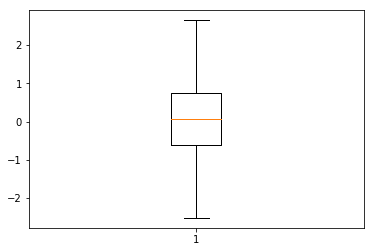

In [6]:
pylab.boxplot(measurements)

### Q-Q-Plot

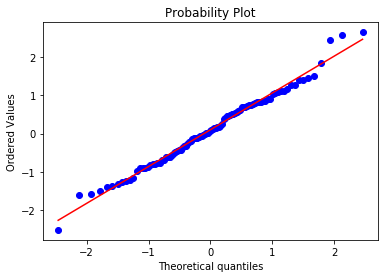

In [7]:
ss.probplot(measurements, dist="norm", plot=pylab)
pylab.show()

### Contraste Kolmogorov-Smirnov (de normalidad p-valor)

Queremos saber si la altura de los habitantes de una ciudad sigue una distribución normal. 
Para ello hemos tomado una muestra de 80 alturas.

In [1]:
import pandas as pd
import scipy.stats as ss

df = pd.read_csv("~/Documents/Week_04/PruebasNorm_datos1.csv")

media, desviacion = ss.norm.fit(df["Altura"])

print(media) # media = 160,37
print(desviacion) # desviacion = 17,41

160.37437801610426
17.413434203608496


Si lo ajustamos a una normal, parece ser que encajaría con una distribución normal de media 160,37 y desviación típica 17,41.

Hemos hecho un ajuste, pero no sabemos cómo de bueno es realmente. Realizamos Kolmogorov-Smirnov.

In [9]:
d, pvalor = ss.kstest(df["Altura"],"norm",args=(media,desviacion))
# o alternativamente hace lo mismo
#d, pvalor = ss.ktest(df["Altura"],lambda x: ss.norm.cdf(x,media,desviacion))

In [10]:
d

0.07029940318559086

In [11]:
pvalor

0.8240450968769732

La estadística d es la distancia máxima absoluta entre los CDF (funciones de distribución) de las dos vbles. Cuanto más cercano esté este número a 0, más probable es que las dos muestras se extraigan de la misma distribución.

Hemos obtenido un pvalor grande por lo que podemos aceptar la hipotesis nula y concluir que estos datos sí que se podrían ajustar a una normal. Es decir, no podemos rechazarla, lo que no significa que haya que dar por hecho que es real.

(Importante tener en cuenta que el pvalor no es una probabilidad, es un indicador)

In [ ]:
# ss.proportions_ztest(x, n, p_null, alternative = 'larger') # para proporciones

In [ ]:
# ss.ztest(data, value = 100, alternative = "larger") # para h0 media=100

In [ ]:
# ss.ztest(poblacion1, poblacion2) # para medias de dos poblaciones